In [108]:
!pip install xgboost

In [109]:
import pandas as pd
import re
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [150]:
dataset = pd.read_csv('Engineering_graduate_salary.csv')

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]


dataset.columns

Index(['Gender', 'Degree', 'Specialization', 'CollegeState', 'collegeGPA',
       'CollegeCityTier', 'GraduationYear', '10percentage', '12graduation',
       '12percentage', 'CollegeTier', 'Salary'],
      dtype='object')

In [111]:
# Splitting the data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [112]:
dataset.head(2)

,Gender,Degree,Specialization,CollegeState,collegeGPA,CollegeCityTier,GraduationYear,10percentage,12graduation,12percentage,CollegeTier,Salary
0,f,B.Tech/B.E.,instrumentation and control engineering,Delhi,73.82,1,2013,87.8,2009,84.0,1,445000
1,m,B.Tech/B.E.,computer science & engineering,Uttar Pradesh,65.00,0,2014,57.0,2010,64.5,2,110000


In [149]:
dataset['CollegeState'].unique()

array(['Delhi', 'Uttar Pradesh', 'Maharashtra', 'Tamil Nadu', 'Punjab',
       'West Bengal', 'Telangana', 'Andhra Pradesh', 'Haryana',
       'Karnataka', 'Orissa', 'Chhattisgarh', 'Rajasthan',
       'Madhya Pradesh', 'Uttarakhand', 'Gujarat', 'Jharkhand',
       'Himachal Pradesh', 'Bihar', 'Union Territory',
       'Jammu and Kashmir', 'Kerala', 'Assam', 'Sikkim', 'Meghalaya',
       'Goa'], dtype=object)

In [113]:
numeric_pipeline = Pipeline([('Scaler', StandardScaler())]) 
categorical_pipeline = Pipeline([('OneHot', OneHotEncoder(handle_unknown='ignore'))])
transformer = ColumnTransformer([('num', numeric_pipeline, ['collegeGPA','CollegeCityTier','GraduationYear','10percentage','12percentage','CollegeTier']), ('cat', categorical_pipeline, ['Gender','Degree','Specialization', 'CollegeState'])]) 


In [114]:


mlpipe = Pipeline([('Transformer',transformer), ('xgb', XGBRegressor())])

In [115]:
# Fitting the model
mlpipe.fit(X_train,y_train)

Pipeline(steps=[('Transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Scaler',
                                                                   StandardScaler())]),
                                                  ['collegeGPA',
                                                   'CollegeCityTier',
                                                   'GraduationYear',
                                                   '10percentage',
                                                   '12percentage',
                                                   'CollegeTier']),
                                                 ('cat',
                                                  Pipeline(steps=[('OneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Degree',
                                                   'Specialization',
                                                   'CollegeState'])])),
                ('xgb',
                 X...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [116]:
y_pred = mlpipe.predict(X_test) 

In [123]:
from sklearn.metrics import mean_squared_error

score = mean_squared_error(y_test, y_pred, squared=False)

score

d:\Machine Learning\Resume Building\venv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


211282.79261781546

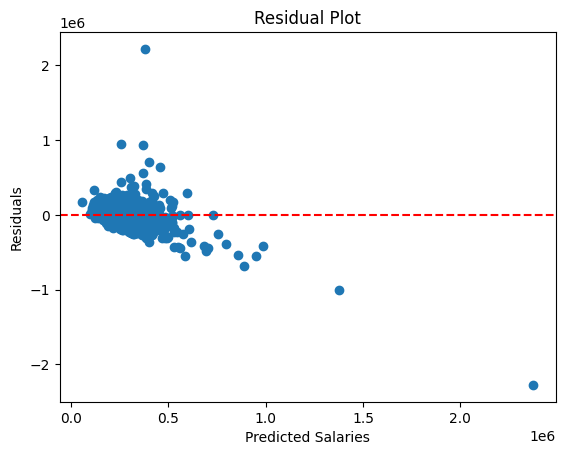

In [134]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Salaries')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [135]:
import joblib

In [136]:
joblib.dump(mlpipe, 'xgbpipe.joblib') 

['xgbpipe.joblib']

In [137]:
model = joblib.load('xgbpipe.joblib')


In [146]:
print(y_test, y_pred)

311     215000
1025    220000
1586    260000
2939    285000
2978    600000
         ...  
913     300000
1430    270000
654     380000
476     385000
1371    180000
Name: Salary, Length: 600, dtype: int64 [ 365736.78   216306.33   254332.73   184225.58   512763.53   419077.
  231202.02   352655.62   234629.97   527430.44   260332.44   286154.2
  313018.78   215097.7    261610.1    274142.97   280575.1    256480.56
  180075.39   205352.42   345174.22   216342.8    224030.89   288148.88
  356550.4    229220.38   236336.64   111993.13   220220.1    246848.22
  459533.84   283313.28   243082.34   259257.06   317936.62   592741.4
  386238.84   210862.66   212940.31   178947.2    326524.2    313374.12
  576534.56   204917.38   201004.14   288927.25   327601.97   342319.6
  251985.88   426616.53   287683.56   230851.4    310381.34   370737.53
  383746.16   277472.44   328498.56   617167.7    276981.5    164936.
  439641.62   185422.25   350111.66   304125.75   363613.34   247292.14
  273546.3